# Machine learning Linear regrestion

### this is a medical dataset from this we have predict charges the person  have to pay on the feature

### loading the csv

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### by the describe we can see that 75 percentile people charges have 17000 but the max value is 65000 by this we can see that they are multiple outlier we can get that we have analyse that first

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
pip install plotly matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!python -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1


### normally these are for ploting and the last line is for giving charts in the same notebook

In [17]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

### this is used to render the plotly in the notebook itself so the we can see the diagram

In [27]:
import plotly.io as pio
pio.renderers.default = "notebook"

# age 

In [28]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [50]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',     # this is for box plot
                   nbins=47,           # this is no of bar in the x-axis
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)          # this is the gap in between the bars
fig.show()

# BMI

In [49]:
fig=px.histogram(df,
                 x='bmi',
                 marginal='box',
                 color_discrete_sequence=['red'],
                 title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

# it was looking gaussian distribution 

# charges

In [52]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','gray'],
                   title='Distribution of charges')
fig.update_layout(bargap=0.1)
fig.show()

In [54]:
fig = px.histogram(df,
                   x='charges',
                   color='sex',
                   color_discrete_sequence=['green','gray'],
                   marginal='box',
                   title='Distribtion with sex as a differenator')
fig.update_layout(bargap=0.1)
fig.show()

In [57]:
fig = px.histogram(df,
                   x='charges',
                   color='region',
                   color_discrete_sequence=['green','gray','blue','red'],
                   marginal='box',
                   title='Distribtion with sex as a differenator')
fig.update_layout(bargap=0.1)
fig.show()

In [60]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [61]:
px.histogram(df,x='smoker',color='sex',title='Smoker')

In [65]:
px.histogram(df,x='sex',title='SEX')

In [66]:
px.histogram(df,x='region',title='REGION')

In [70]:
fig=px.histogram(df,x='children',title='CHILDREN')
fig.update_layout(bargap=0.1)
fig.show()

# scatter plot between age vs charges

In [76]:
fig=px.scatter(df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title='AGE vs CHARGE')
fig.update_traces(marker_size=5)
fig.show()
               

# scatter plot between BMI and charges

In [79]:
fig=px.scatter(df,
               x='bmi',
               y='charges',
               opacity=0.8,
               color='smoker',
               hover_data=['sex'],
               title='BMI vs Charger')
fig.update_traces(marker_size=5)
fig.show()

In [118]:
fig = px.violin(
    df,
    x="children",
    y="charges",
    color="smoker",
    box=True,       # adds a boxplot inside the violin
    points="all",   # shows all individual data points
    title="Charges distribution by children and Smoker"
)
fig.show()

In [86]:
fig = px.violin(
    df,
    x="region",
    y="charges",
    color="smoker",
    box=True,       # adds a boxplot inside the violin
    points="all",   # shows all individual data points
    title="Charges distribution by region and Smoker"
)
fig.show()

In [87]:
fig = px.violin(
    df,
    x="sex",
    y="charges",
    color="smoker",
    box=True,       # adds a boxplot inside the violin
    points="all",   # shows all individual data points
    title="Charges distribution by Sex and Smoker"
)
fig.show()

In [89]:
fig = px.violin(
    df,
    x="smoker",
    y="charges",
    color='smoker',
    box=True,       # adds a boxplot inside the violin
    points="all",   # shows all individual data points
    title="Charges distribution by  Smoker"
)
fig.show()

# corelation between two features

In [92]:
df.charges.corr(df.age)

np.float64(0.2990081933306478)

In [93]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362887)

In [94]:
df.charges.corr(df.children)

np.float64(0.06799822684790487)

### corelation only works with numeric data so we have convert the text data in smoker to numeric to see tge correlation 

In [96]:
smoker_value={'no':0,'yes':1}
smoker_numeric=df.smoker.map(smoker_value)

In [99]:
df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [101]:
sex_value={'male':0,'female':1}
sex_numeric=df.sex.map(sex_value)
df.charges.corr(sex_numeric)

np.float64(-0.05729206220202533)

In [105]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'corelation matrix')

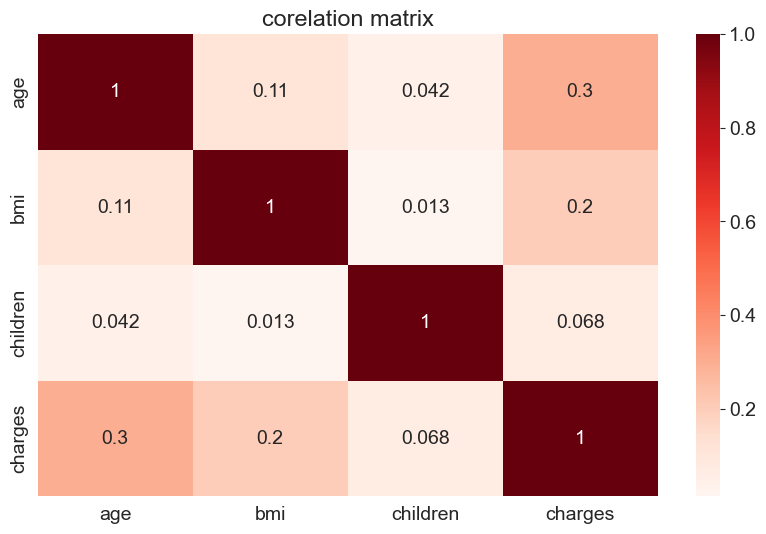

In [116]:
sns.heatmap(df.corr(numeric_only=True),cmap='Reds',annot=True)
plt.title('corelation matrix')